## Forecasting TSI - 6 Hours ahead Activation Functions Experiments

This is a notebook created to train the LSTM to forecast TSI, and to make tests with different settings looking for the best one. It is being costumized with the purpose to generate results to the work will be submitted to JSWSC.

In [3]:
from library import *

Using TensorFlow backend.
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib

In [4]:
np.random.seed(7)

In [5]:
P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_412dias_6hours.csv'))
T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_412dias_6hours.csv'))
Time1 = np.asarray(np.loadtxt('./partial_output_files/412D/Time_412dias_6hours.csv'))

P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_301dias_6hours.csv'))
T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_301dias_6hours.csv'))
Time2 = np.asarray(np.loadtxt('./partial_output_files/301D/Time_301dias_6hours.csv'))

P3 = np.asarray(np.loadtxt('./partial_output_files/105D1/P_105dias_6hours.csv'))
T3 = np.asarray(np.loadtxt('./partial_output_files/105D1/T_105dias_6hours.csv'))
Time3 = np.asarray(np.loadtxt('./partial_output_files/105D1/Time_105dias_6hours.csv'))

P4 = np.asarray(np.loadtxt('./partial_output_files/105D2/P_105dias_6hours.csv'))
T4 = np.asarray(np.loadtxt('./partial_output_files/105D2/T_105dias_6hours.csv'))
Time4 = np.asarray(np.loadtxt('./partial_output_files/105D2/Time_105dias_6hours.csv'))

P5 = np.asarray(np.loadtxt('./partial_output_files/30D/P_30dias_6hours.csv'))
T5 = np.asarray(np.loadtxt('./partial_output_files/30D/T_30dias_6hours.csv'))
Time5 = np.asarray(np.loadtxt('./partial_output_files/30D/Time_30dias_6hours.csv'))


figuresPath = 'C:\\Users\Ami\Dropbox\Tese\Monografia\Figuras\\'

P1 = np.transpose(P1)
T1 = T1.reshape(-1,1)

P2 = np.transpose(P2)
T2 = T2.reshape(-1,1)

P3 = np.transpose(P3)
T3 = T3.reshape(-1,1)

P4 = np.transpose(P4)
T4 = T4.reshape(-1,1)

P5 = np.transpose(P5)
T5 = T5.reshape(-1,1)

PT = P5
TT = T5

timeTerm = 'Six Hours'
print(P1.shape)
print(P2.shape)
print(P3.shape)
print(P4.shape)
print(T1.shape)
#print(Time1.shape)

(1651, 40)
(1207, 40)
(423, 40)
(423, 40)
(1651, 1)


In [6]:
print(np.count_nonzero(np.isnan(P1)))
print(np.count_nonzero(np.isnan(P2)))
print(np.count_nonzero(np.isnan(P3)))
print(np.count_nonzero(np.isnan(P4)))
print(np.count_nonzero(np.isnan(P5)))
print('')
print(np.count_nonzero(np.isnan(T1)))
print(np.count_nonzero(np.isnan(T2)))
print(np.count_nonzero(np.isnan(T3)))
print(np.count_nonzero(np.isnan(T4)))
print(np.count_nonzero(np.isnan(T5)))

0
0
0
0
0

0
0
0
0
0


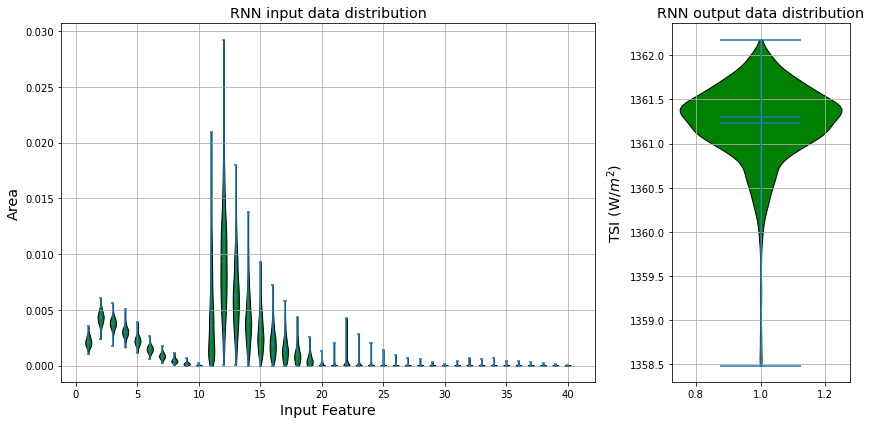

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import gridspec
# import seaborn as sns

fig = plt.figure(figsize=(12,6))

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

ax0 = plt.subplot(gs[0])
ax0.set_title ("RNN input data distribution",fontsize='x-large')
parts = ax0.violinplot(np.concatenate([P1,P2,P3,P5]), showmeans=True, showmedians=True,
        showextrema=True)
ax0.set_xlabel("Input Feature",fontsize='x-large')
ax0.set_ylabel("Area",fontsize='x-large')
ax0.grid()

for pc in parts['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

# sns.set(style="darkgrid")
# df = sns.load_dataset('./partial_output_files/412D/P_412dias_6hours.csv')
 
# creating a dictionary with one specific color per group:
# my_pal = {"versicolor": "g", "setosa": "b", "virginica": "m"}
 
# plot it
# sns.violinplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
# plt.show()
# for ax in grid.axes.flatten():
#     ax.collections[0].set_edgecolor('red')

ax1 = plt.subplot(gs[1])
ax1.set_title ("RNN output data distribution",fontsize='x-large')
parts = ax1.violinplot(np.concatenate([T1,T2,T3,T5]), showmeans=True, showmedians=True,
        showextrema=True)
ax1.set_xlabel("")
ax1.set_ylabel(r'TSI (W/$m^2$)',fontsize='x-large')
ax1.grid()

for pc in parts['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_edgecolor
    pc.set_alpha(1)
    
plt.tight_layout()

# plt.savefig(figuresPath+'IO_Range.png',dpi=200,format='png')

In [8]:
scalerIn = MinMaxScaler(feature_range=(-1, 1))
scalerOut = MinMaxScaler(feature_range=(0, 1))

# scalerIn = MinMaxScaler(feature_range=(0, 1))
# scalerOut = MinMaxScaler(feature_range=(0, 1))

# scalerIn = StandardScaler()
# scalerOut = StandardScaler()

# scalerIn.fit(P1)
# scalerOut.fit(T1)

# scalerIn.fit(np.concatenate([P1,P2]))
# scalerOut.fit(np.concatenate([T1,T2]))

scalerIn.fit(np.concatenate([P1,P2,P3]))
scalerOut.fit(np.concatenate([T1,T2,T3]))

x1 = scalerIn.transform(P1)
x2 = scalerIn.transform(P2)
x3 = scalerIn.transform(P3)
x4 = scalerIn.transform(P4)
x5 = scalerIn.transform(P5)

xt = scalerIn.transform(PT)

y1 = scalerOut.transform(T1)
y2 = scalerOut.transform(T2)
y3 = scalerOut.transform(T3)
y4 = scalerOut.transform(T4)
y5 = scalerOut.transform(T5)

yt = scalerOut.transform(TT)

print(int(x1.shape[0]*0.8))
print(int(np.concatenate([x1,x2]).shape[0]*0.8))
print(int(np.concatenate([x1,x2,x3]).shape[0]*0.8))

1320
2286
2624


In [10]:
from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

class Swish(Activation):
    
    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))


get_custom_objects().update({'swish': Swish(swish)})


Defining a mask value (an outlier value) to replace the *nan* values of the output vector. (The nets can't deal with *nan* values)

In [11]:
units = 35
epochs = 50
shuffle = True
test_size = 0.2
#loss='mse'
loss = 'mean_squared_error'
optimizer = 'adam'
afunction = "swish"
#optimizer = 'rmsprop'
# dropout = 0.2
lookback = 1
# batchRate = 5/100

In [12]:
hp = [] 

hp.append('Training Sets=P1,P2,P3')
hp.append('Test Set=P5')
hp.append('Epochs='+str(epochs))
hp.append('Loss='+str(loss))
# hp.append('Dropout='+str(dropout))
# hp.append('BatchRate='+str(batchRate))
outputPath = './output_files/Activation/'

In [13]:
# mse = []
testsqtd = 20
error =[]
rnn = []
# expName = outputPath + timeTerm + "Exp_gru"
expName = outputPath + "Exp_lstm_swish"
# expName = outputPath + "teste"

hpFile = expName + "_hp.csv"
f = open(hpFile, 'w')
writer = csv.writer(f)
writer.writerows(hp)
f.close()

# unitsNumbers = range(1, 10)
# unitsNumbers = range(25, 50, 5)
# unitsNumbers = range(50, 51)
#epochsNumbers = [50, 60, 80, 100, 150, 300]
# batchSizes = [32,64,128,256,512,1024]
# batchSizes = [32,64,128,256]
# batchSizes = [512,1024]
# lookbacks = range(1,5)
# batchRates = np.arange(1,0.19,-0.2)
batchRates = [0.01]

# for units in unitsNumbers:
# for batchRate in batchRates:    
# for batch_size in batchSizes:    
    
p = np.concatenate([x1,x2,x3])
t = np.concatenate([y1,y2,y3])

#     p = np.concatenate([x1,x2])
#     t = np.concatenate([y1,y2])

#     p = x1
#     t = y1

sxTest = xt
syTest = yt

# p = np.concatenate([P1,P2,P3])
# t = np.concatenate([T1,T2,T3])

# sxTest = PT
# syTest = TT

# sxTest,syTest = lookBack(xt,yt,lookback)
# sxTest = np.asarray(sxTest)
# syTest = np.asarray(syTest)

# p, t = lookBack(p,t,lookback)
# p = np.asarray(p)
# t = np.asarray(t)

sxTrain, sxVal, syTrain, syVal= train_test_split(p, t, test_size=test_size, shuffle=shuffle)

# sxTrain = sxTrain.reshape((sxTrain.shape[0], lookback, sxTrain.shape[2])) 
# sxVal = sxVal.reshape((sxVal.shape[0], lookback, sxVal.shape[2]))
# sxTest = sxTest.reshape((sxTest.shape[0], lookback, sxTest.shape[2])) 

sxTrain = sxTrain.reshape((sxTrain.shape[0], lookback, sxTrain.shape[1])) 
sxVal = sxVal.reshape((sxVal.shape[0], lookback, sxVal.shape[1]))
sxTest = sxTest.reshape((sxTest.shape[0], lookback, sxTest.shape[1])) 


for batchRate in batchRates:
    batch_size = int(sxTrain.shape[0] * batchRate)
#for dropout in dropouts:
#for units in unitsNumbers: # used for units number tests
# for lookback in lookbacks: #used only for lookback tests
    
    for j in range(testsqtd):
        
        #keras.backend.clear_session()
        
#         print('\n\nTest #'+str(j+1)+' for batch rate = '+str(batchRate*100)+'% and batch size = '+str(batch_size)+':') # used for batch_size tests
#         print('\n\nTest #'+str(j+1)+' for batch size = '+str(batch_size)+':') # used for batch_size tests
#         print('\n\nTest #'+str(j+1)+' for lookback = '+str(lookback)+':') # used for lookback tests
#         print('\n\nTest #'+str(j+1)+' for '+str(units)+' units:') # used for units number tests
        #print('\n\nTest #'+str(j+1)+' for dropout rate = '+str(dropout)+":") # used for dropout tests
        print("Teste #"+str(j+1)+" para batch rate of "+str(batchRate)+"%: "+str(batch_size))

        model = Sequential()
#         model.add(SimpleRNN(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]), activation='relu'))#, return_sequences=True)) # , return_sequences=True
        model.add(LSTM(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]), activation=afunction))#, return_sequences=True)) # , return_sequences=True
#         model.add(GRU(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]), activation=afunction))#, return_sequences=True)) # , return_sequences=True
        #model.add(LSTM(units=10))
        #model.add(Dropout(dropout))
        model.add(Dense(1))
        model.compile(loss=loss, optimizer=optimizer)

        # checkpoint
        filepath = expName+'.hdf5'
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
        callbacks_list = [checkpoint]
        
        # Fit the model
        f = model.fit(sxTrain, syTrain, epochs=epochs, batch_size=batch_size, validation_data=(sxVal,syVal), callbacks=callbacks_list)

        #Load the best weights
        model.load_weights(filepath)

        #Compile model (required to make predictions)
        model.compile(loss=loss, optimizer=optimizer) #, metrics=['accuracy'])
        
        syTrainP = model.predict(sxTrain)
        syValP = model.predict(sxVal)
        syTestP = model.predict(sxTest)
        
        yTestP = scalerOut.inverse_transform(syTestP)
        yTest = scalerOut.inverse_transform(syTest)

#         yTestP = syTestP
#         yTest = syTest

        rnnR2 = r2_score(yTest, yTestP)
        rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
        rnnMSE = mean_squared_error(yTest, yTestP)
        rnnMAPE = mean_absolute_percentage_error(yTest, yTestP)

        error.append([epochs, np.min(f.history['val_loss'])])
        rnn.append([epochs, rnnR2, rnnR, rnnMSE, rnnMAPE])
        print('net R2: {:2.2%} Corr: {:2.2%} MSE: {:2.2}'.format(rnnR2, rnnR, rnnMSE, rnnMAPE))
np.savetxt(expName+'.csv',rnn)

Teste #1 para batch rate of 0.01%: 26

Train on 2624 samples, validate on 657 samples
Epoch 1/50
2624/2624 [==============================] - 1s 292us/step - loss: 0.0840 - val_loss: 0.0114
Epoch 2/50
2624/2624 [==============================] - 0s 101us/step - loss: 0.0079 - val_loss: 0.0049
Epoch 3/50
2624/2624 [==============================] - 0s 98us/step - loss: 0.0043 - val_loss: 0.0033
Epoch 4/50
2624/2624 [==============================] - 0s 99us/step - loss: 0.0031 - val_loss: 0.0025
Epoch 5/50
2624/2624 [==============================] - 0s 100us/step - loss: 0.0023 - val_loss: 0.0018
Epoch 6/50
2624/2624 [==============================] - 0s 102us/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/50
2624/2624 [==============================] - 0s 101us/step - loss: 0.0011 - val_loss: 7.7918e-04
Epoch 8/50
2624/2624 [==============================] - 0s 98us/step - loss: 7.8427e-04 - val_loss: 6.0084e-04
Epoch 9/50
2624/2624 [==============================] - 0s 102us/step - l

2624/2624 [==============================] - 0s 128us/step - loss: 3.6452e-04 - val_loss: 3.6992e-04
Epoch 21/50
2624/2624 [==============================] - 0s 118us/step - loss: 4.0795e-04 - val_loss: 3.7228e-04
Epoch 22/50
2624/2624 [==============================] - 0s 116us/step - loss: 3.5108e-04 - val_loss: 3.6238e-04
Epoch 23/50
2624/2624 [==============================] - 0s 119us/step - loss: 3.6991e-04 - val_loss: 4.6414e-04
Epoch 24/50
2624/2624 [==============================] - 0s 139us/step - loss: 3.6609e-04 - val_loss: 5.8218e-04
Epoch 25/50
2624/2624 [==============================] - 0s 110us/step - loss: 3.4189e-04 - val_loss: 4.5489e-04
Epoch 26/50
2624/2624 [==============================] - 0s 110us/step - loss: 3.4802e-04 - val_loss: 4.2839e-04
Epoch 27/50
2624/2624 [==============================] - 0s 107us/step - loss: 3.8155e-04 - val_loss: 3.9665e-04
Epoch 28/50
2624/2624 [==============================] - 0s 104us/step - loss: 3.4431e-04 - val_loss: 4.4189

2624/2624 [==============================] - 0s 110us/step - loss: 3.2059e-04 - val_loss: 3.2209e-04
Epoch 43/50
2624/2624 [==============================] - 0s 118us/step - loss: 3.0850e-04 - val_loss: 3.3450e-04
Epoch 44/50
2624/2624 [==============================] - 0s 101us/step - loss: 3.1804e-04 - val_loss: 3.2756e-04
Epoch 45/50
2624/2624 [==============================] - 0s 102us/step - loss: 3.1008e-04 - val_loss: 3.2858e-04
Epoch 46/50
2624/2624 [==============================] - 0s 97us/step - loss: 3.1838e-04 - val_loss: 3.8029e-04
Epoch 47/50
2624/2624 [==============================] - 0s 99us/step - loss: 3.1857e-04 - val_loss: 3.2151e-04
Epoch 48/50
2624/2624 [==============================] - 0s 118us/step - loss: 3.3583e-04 - val_loss: 4.0643e-04
Epoch 49/50
2624/2624 [==============================] - 0s 122us/step - loss: 3.2840e-04 - val_loss: 3.2044e-04
Epoch 50/50
2624/2624 [==============================] - 0s 108us/step - loss: 2.9137e-04 - val_loss: 3.2915e-

2624/2624 [==============================] - 0s 123us/step - loss: 6.0382e-04 - val_loss: 4.7823e-04
Epoch 14/50
2624/2624 [==============================] - 0s 111us/step - loss: 5.2155e-04 - val_loss: 4.7811e-04
Epoch 15/50
2624/2624 [==============================] - 0s 118us/step - loss: 4.7772e-04 - val_loss: 4.3163e-04
Epoch 16/50
2624/2624 [==============================] - 0s 117us/step - loss: 4.5602e-04 - val_loss: 4.1078e-04
Epoch 17/50
2624/2624 [==============================] - 0s 114us/step - loss: 4.4059e-04 - val_loss: 4.0186e-04
Epoch 18/50
2624/2624 [==============================] - 0s 129us/step - loss: 4.3520e-04 - val_loss: 4.0482e-04
Epoch 19/50
2624/2624 [==============================] - 0s 110us/step - loss: 4.0310e-04 - val_loss: 3.7528e-04
Epoch 20/50
2624/2624 [==============================] - 0s 123us/step - loss: 4.1327e-04 - val_loss: 3.6360e-04
Epoch 21/50
2624/2624 [==============================] - 0s 115us/step - loss: 4.2813e-04 - val_loss: 3.8328

2624/2624 [==============================] - 0s 107us/step - loss: 3.2319e-04 - val_loss: 4.4213e-04
Epoch 36/50
2624/2624 [==============================] - 0s 106us/step - loss: 3.0658e-04 - val_loss: 3.3112e-04
Epoch 37/50
2624/2624 [==============================] - 0s 110us/step - loss: 2.9725e-04 - val_loss: 3.1947e-04
Epoch 38/50
2624/2624 [==============================] - 0s 109us/step - loss: 2.9917e-04 - val_loss: 2.9483e-04
Epoch 39/50
2624/2624 [==============================] - 0s 109us/step - loss: 2.9745e-04 - val_loss: 3.0059e-04
Epoch 40/50
2624/2624 [==============================] - 0s 104us/step - loss: 3.4481e-04 - val_loss: 2.9974e-04
Epoch 41/50
2624/2624 [==============================] - 0s 109us/step - loss: 3.1944e-04 - val_loss: 5.4675e-04
Epoch 42/50
2624/2624 [==============================] - 0s 132us/step - loss: 2.9790e-04 - val_loss: 3.8041e-04
Epoch 43/50
2624/2624 [==============================] - 0s 107us/step - loss: 3.0438e-04 - val_loss: 2.8867

2624/2624 [==============================] - 0s 152us/step - loss: 0.0011 - val_loss: 9.4421e-04
Epoch 7/50
2624/2624 [==============================] - 0s 158us/step - loss: 8.9750e-04 - val_loss: 7.3925e-04
Epoch 8/50
2624/2624 [==============================] - 0s 161us/step - loss: 7.3683e-04 - val_loss: 6.4130e-04
Epoch 9/50
2624/2624 [==============================] - 0s 125us/step - loss: 6.4161e-04 - val_loss: 5.0446e-04
Epoch 10/50
2624/2624 [==============================] - 0s 136us/step - loss: 5.8399e-04 - val_loss: 4.7088e-04
Epoch 11/50
2624/2624 [==============================] - 0s 131us/step - loss: 5.3497e-04 - val_loss: 5.9140e-04
Epoch 12/50
2624/2624 [==============================] - 0s 128us/step - loss: 5.1760e-04 - val_loss: 4.2764e-04
Epoch 13/50
2624/2624 [==============================] - 0s 133us/step - loss: 4.7657e-04 - val_loss: 4.3318e-04
Epoch 14/50
2624/2624 [==============================] - 0s 125us/step - loss: 4.8789e-04 - val_loss: 4.5332e-04
Ep

2624/2624 [==============================] - 0s 117us/step - loss: 3.9668e-04 - val_loss: 3.8088e-04
Epoch 29/50
2624/2624 [==============================] - 0s 114us/step - loss: 4.6502e-04 - val_loss: 3.8210e-04
Epoch 30/50
2624/2624 [==============================] - 0s 110us/step - loss: 3.4729e-04 - val_loss: 3.5852e-04
Epoch 31/50
2624/2624 [==============================] - 0s 109us/step - loss: 3.4669e-04 - val_loss: 4.4687e-04
Epoch 32/50
2624/2624 [==============================] - 0s 115us/step - loss: 3.6812e-04 - val_loss: 3.5617e-04
Epoch 33/50
2624/2624 [==============================] - 0s 115us/step - loss: 3.7314e-04 - val_loss: 4.4307e-04
Epoch 34/50
2624/2624 [==============================] - 0s 114us/step - loss: 3.9837e-04 - val_loss: 3.6741e-04
Epoch 35/50
2624/2624 [==============================] - 0s 127us/step - loss: 3.7937e-04 - val_loss: 3.8932e-04
Epoch 36/50
2624/2624 [==============================] - 0s 129us/step - loss: 3.6130e-04 - val_loss: 3.9050

2624/2624 [==============================] - 0s 124us/step - loss: 2.9896e-04 - val_loss: 4.0655e-04
net R2: 99.34% Corr: 99.72% MSE: 0.0071
Teste #11 para batch rate of 0.01%: 26
Train on 2624 samples, validate on 657 samples
Epoch 1/50
2624/2624 [==============================] - 2s 657us/step - loss: 0.1475 - val_loss: 0.0139
Epoch 2/50
2624/2624 [==============================] - 0s 125us/step - loss: 0.0081 - val_loss: 0.0049
Epoch 3/50
2624/2624 [==============================] - 0s 125us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 4/50
2624/2624 [==============================] - 0s 157us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 5/50
2624/2624 [==============================] - 0s 139us/step - loss: 0.0020 - val_loss: 0.0014
Epoch 6/50
2624/2624 [==============================] - 0s 133us/step - loss: 0.0013 - val_loss: 9.4552e-04
Epoch 7/50
2624/2624 [==============================] - 0s 132us/step - loss: 9.3599e-04 - val_loss: 7.6075e-04
Epoch 8/50
2624/2624 [===========

2624/2624 [==============================] - 0s 121us/step - loss: 3.7657e-04 - val_loss: 3.4495e-04
Epoch 22/50
2624/2624 [==============================] - 0s 120us/step - loss: 3.7105e-04 - val_loss: 3.3287e-04
Epoch 23/50
2624/2624 [==============================] - 0s 120us/step - loss: 3.5288e-04 - val_loss: 3.9822e-04
Epoch 24/50
2624/2624 [==============================] - 0s 124us/step - loss: 3.5305e-04 - val_loss: 3.5979e-04
Epoch 25/50
2624/2624 [==============================] - 0s 112us/step - loss: 3.7125e-04 - val_loss: 4.7257e-04
Epoch 26/50
2624/2624 [==============================] - 0s 121us/step - loss: 3.4470e-04 - val_loss: 3.3015e-04
Epoch 27/50
2624/2624 [==============================] - 0s 147us/step - loss: 3.4032e-04 - val_loss: 3.1849e-04
Epoch 28/50
2624/2624 [==============================] - 0s 149us/step - loss: 3.3503e-04 - val_loss: 3.6285e-04
Epoch 29/50
2624/2624 [==============================] - 0s 127us/step - loss: 3.3423e-04 - val_loss: 3.1759

Epoch 43/50
2624/2624 [==============================] - 0s 185us/step - loss: 3.0833e-04 - val_loss: 3.2823e-04
Epoch 44/50
2624/2624 [==============================] - 1s 192us/step - loss: 3.0938e-04 - val_loss: 3.3993e-04
Epoch 45/50
2624/2624 [==============================] - 0s 183us/step - loss: 3.1551e-04 - val_loss: 4.0638e-04
Epoch 46/50
2624/2624 [==============================] - 1s 222us/step - loss: 3.1410e-04 - val_loss: 3.1508e-04
Epoch 47/50
2624/2624 [==============================] - 1s 198us/step - loss: 2.9820e-04 - val_loss: 3.1796e-04
Epoch 48/50
2624/2624 [==============================] - 1s 208us/step - loss: 2.9527e-04 - val_loss: 3.1291e-04
Epoch 49/50
2624/2624 [==============================] - 0s 190us/step - loss: 2.9916e-04 - val_loss: 3.5614e-04
Epoch 50/50
2624/2624 [==============================] - 1s 191us/step - loss: 2.9960e-04 - val_loss: 3.7523e-04
net R2: 99.46% Corr: 99.78% MSE: 0.0057
Teste #14 para batch rate of 0.01%: 26
Train on 2624 sam

2624/2624 [==============================] - 0s 143us/step - loss: 4.2670e-04 - val_loss: 3.8490e-04
Epoch 15/50
2624/2624 [==============================] - 0s 175us/step - loss: 4.1984e-04 - val_loss: 3.8032e-04
Epoch 16/50
2624/2624 [==============================] - 1s 201us/step - loss: 3.8682e-04 - val_loss: 3.6386e-04
Epoch 17/50
2624/2624 [==============================] - 1s 213us/step - loss: 4.0736e-04 - val_loss: 3.9414e-04
Epoch 18/50
2624/2624 [==============================] - 1s 216us/step - loss: 4.0551e-04 - val_loss: 3.6191e-04
Epoch 19/50
2624/2624 [==============================] - 0s 149us/step - loss: 3.7032e-04 - val_loss: 3.5331e-04
Epoch 20/50
2624/2624 [==============================] - 0s 146us/step - loss: 3.6920e-04 - val_loss: 3.3753e-04
Epoch 21/50
2624/2624 [==============================] - 0s 139us/step - loss: 3.8718e-04 - val_loss: 3.4136e-04
Epoch 22/50
2624/2624 [==============================] - 0s 186us/step - loss: 3.9012e-04 - val_loss: 3.8123

Epoch 36/50
2624/2624 [==============================] - 1s 223us/step - loss: 3.5564e-04 - val_loss: 3.1901e-04
Epoch 37/50
2624/2624 [==============================] - ETA: 0s - loss: 3.1530e-0 - 1s 193us/step - loss: 3.0990e-04 - val_loss: 3.1954e-04
Epoch 38/50
2624/2624 [==============================] - 1s 196us/step - loss: 3.1039e-04 - val_loss: 4.1475e-04
Epoch 39/50
2624/2624 [==============================] - 1s 203us/step - loss: 3.0218e-04 - val_loss: 3.1309e-04
Epoch 40/50
2624/2624 [==============================] - 0s 154us/step - loss: 3.1951e-04 - val_loss: 3.1524e-04
Epoch 41/50
2624/2624 [==============================] - 0s 139us/step - loss: 3.0732e-04 - val_loss: 3.1582e-04
Epoch 42/50
2624/2624 [==============================] - 0s 146us/step - loss: 2.9716e-04 - val_loss: 3.2720e-04
Epoch 43/50
2624/2624 [==============================] - ETA: 0s - loss: 3.3363e-0 - 0s 172us/step - loss: 3.4183e-04 - val_loss: 4.4475e-04
Epoch 44/50
2624/2624 [=================

Epoch 7/50
2624/2624 [==============================] - 0s 149us/step - loss: 0.0013 - val_loss: 8.4906e-04
Epoch 8/50
2624/2624 [==============================] - 0s 145us/step - loss: 0.0011 - val_loss: 7.5534e-04
Epoch 9/50
2624/2624 [==============================] - 0s 136us/step - loss: 9.6212e-04 - val_loss: 6.7830e-04
Epoch 10/50
2624/2624 [==============================] - 0s 136us/step - loss: 8.5686e-04 - val_loss: 7.0621e-04
Epoch 11/50
2624/2624 [==============================] - 0s 143us/step - loss: 7.7866e-04 - val_loss: 5.4382e-04
Epoch 12/50
2624/2624 [==============================] - 0s 134us/step - loss: 7.1960e-04 - val_loss: 5.4384e-04
Epoch 13/50
2624/2624 [==============================] - 0s 147us/step - loss: 6.6537e-04 - val_loss: 5.3856e-04
Epoch 14/50
2624/2624 [==============================] - 0s 131us/step - loss: 6.4271e-04 - val_loss: 4.8405e-04
Epoch 15/50
2624/2624 [==============================] - 0s 124us/step - loss: 5.8108e-04 - val_loss: 4.646

Epoch 29/50
2624/2624 [==============================] - 0s 152us/step - loss: 3.5226e-04 - val_loss: 3.9650e-04
Epoch 30/50
2624/2624 [==============================] - 0s 152us/step - loss: 3.5593e-04 - val_loss: 4.9899e-04
Epoch 31/50
2624/2624 [==============================] - 0s 183us/step - loss: 3.4084e-04 - val_loss: 3.7445e-04
Epoch 32/50
2624/2624 [==============================] - 0s 160us/step - loss: 3.3815e-04 - val_loss: 3.2531e-04
Epoch 33/50
2624/2624 [==============================] - 0s 153us/step - loss: 3.3498e-04 - val_loss: 3.6875e-04
Epoch 34/50
2624/2624 [==============================] - 0s 153us/step - loss: 3.3951e-04 - val_loss: 3.5662e-04
Epoch 35/50
2624/2624 [==============================] - 0s 168us/step - loss: 3.4613e-04 - val_loss: 4.1062e-04
Epoch 36/50
2624/2624 [==============================] - 0s 168us/step - loss: 3.5898e-04 - val_loss: 4.0193e-04
Epoch 37/50
2624/2624 [==============================] - 0s 155us/step - loss: 3.2418e-04 - val_

2624/2624 [==============================] - 0s 138us/step - loss: 2.9112e-04 - val_loss: 4.0997e-04
net R2: 99.45% Corr: 99.77% MSE: 0.0059


In [22]:
print(p.shape)
print(sxTrain.shape)
print(filepath)

(3281, 40)
(2624, 1, 40)
./output_files/Scaling/Exp_lstm_MinMax.hdf5


#### Training and Validation Losses Histories

In [67]:
# fig = plt.plot(fig_size=(12,6))
# plt.plot(f.history['loss'], label='Train')
# plt.plot(f.history['val_loss'], label='Test')
# plt.title('Training and Test Errors', fontsize=16)
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.legend()

In [68]:
# make predictions
syTrainP = model.predict(sxTrain)
syValP = model.predict(sxVal)   

syTrain = syTrain

yTrain = scalerOut.inverse_transform(syTrain)
yTrainP = scalerOut.inverse_transform(syTrainP)

yVal = scalerOut.inverse_transform(syVal)
yValP = scalerOut.inverse_transform(syValP)

# syTrainP = sxTrain
# syValP = sxVal  

# syTrain = syTrain

# yTrain = syTrain
# yTrainP = syTrainP

# yVal = syVal
# yValP = syValP

print(yTrain.shape)
print(yTrainP.shape)

(2624, 1)
(2624, 1)


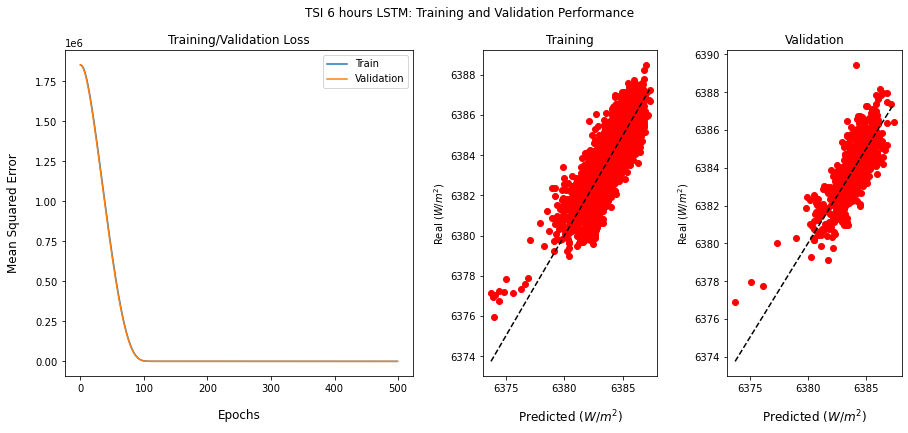

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1, 1]})

plt.subplots_adjust(wspace=0.3)#, hspace=None)
plt.suptitle("TSI 6 hours LSTM: Training and Validation Performance")

trainMin = np.min([np.min(yTrain),np.min(yTrainP)])

ax1.plot(f.history['loss'], label='Train')
ax1.plot(f.history['val_loss'], label='Validation')
ax1.set_title('Training/Validation Loss')
ax1.set_xlabel('Epochs', labelpad=15, fontsize='large')
ax1.set_ylabel('Mean Squared Error', labelpad=15, fontsize='large')
ax1.legend()

ax2.scatter(yTrain,yTrainP, color='red')
ax2.set_xlabel('Predicted ($W/m^2$)', labelpad=15, fontsize='large')
ax2.set_ylabel('Real ($W/m^2$)')
ax2.set_title('Training')
#plt.plot([-2,2],[-2,2])
ax2.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
         linestyle='--', label='optimal')

ax3.scatter(yVal,yValP, color='red')
ax3.set_xlabel('Predicted ($W/m^2$)', labelpad=15, fontsize='large')
ax3.set_ylabel('Real ($W/m^2$)')
# ax3.set_yticks([])
ax3.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax3.plot([yVal.min(), yVal.max()], [yVal.min(), yVal.max()], color='black', 
         linestyle='--', label='optimal')

#fig.savefig('./Figures/LSTM Training x Validation 6Hours.png', dpi=600, format='png')
fig.savefig('./Figures/LSTM Training x Validation 6Hours.pdf', dpi=300, format='pdf')

In [70]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
# #plt.figure()
# ax1.scatter(yTrain,yTrainP, color='red')
# ax1.set_xlabel('Predicted')
# ax1.set_ylabel('Real')
# ax1.set_title('Training')
# #plt.plot([-2,2],[-2,2])
# ax1.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
#          linestyle='--', label='optimal')

# ax2.scatter(yVal,yValP, color='red')
# ax2.set_xlabel('Predicted')
# ax2.set_ylabel('Real')
# ax2.set_title('Validation')
# #plt.plot([-2,2],[-2,2])
# ax2.plot([yVal.min(), yVal.max()], [yVal.min(), yVal.max()], color='black', 
#          linestyle='--', label='optimal')

# #plt.figure()
# ax3.scatter(yTest,yTestP, color='red')
# ax3.set_xlabel('Predicted')
# ax3.set_ylabel('Real')
# ax3.set_title('Test')
# #plt.plot([-2,2],[-2,2])
# ax3.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
#          linestyle='--', label='optimal')

Ploting and comparing the 50 first true and predicted values:

In [43]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# ax1.plot(yTrain,'b-',label='true')
# ax1.plot(yTrainP,'g.:',label='predicted')
# ax1.set_ylim((yTrain.min(),yTrain.max()))
# ax1.set_title('Training Performance')
# ax1.legend()

# ax2.plot(yVal,'b-',label='true')
# ax2.plot(yValP,'g.:',label='predicted')
# ax2.set_ylim((yVal.min(),yVal.max()))
# ax2.set_title('Validation Performance')
# ax2.legend()

# ax3.plot(yTest,'b-',label='true')
# ax3.plot(yTestP,'g.:',label='predicted')
# ax3.set_ylim((yTrain.min(),yTrain.max()))
# ax3.set_title('Test Performance')
# ax3.legend()

### Predicting Test Set

In [47]:
from matplotlib import dates

dataT = []
hours = [0,0.25,0.5,0.75]
h = 0
datesT = np.zeros(Time4.shape[0])
for i in Time4:
    index = np.mod(h,4)
    dataT = str(date.fromordinal(int(i)))
    datesT[h] = dates.date2num(dataT)+hours[index]
    h += 1
    
# datesT = dates.date2num(dataT)

hfmt = dates.DateFormatter('%m/%d')

ValueError: x and y must have same first dimension, but have shapes (423,) and (123, 1)

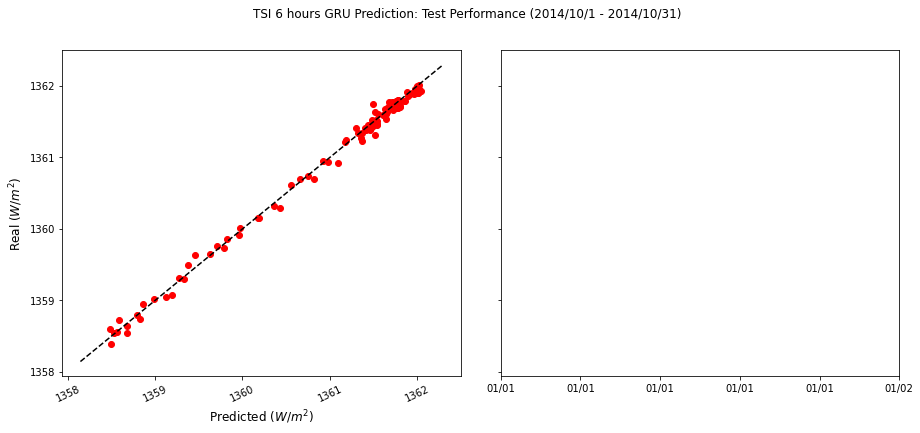

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.subplots_adjust(wspace=0.1)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])-0.25
ma = np.max([yTestP.max(),yTest.max()])+0.25

yAxis = [mi,ma]

plt.suptitle('TSI 6 hours GRU Prediction: Test Performance (2014/10/1 - 2014/10/31)')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2$)', labelpad=5, fontsize='large')
ax1.set_ylabel('Real ($W/m^2$)', labelpad=5, fontsize='large')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax1.tick_params(axis='x', rotation=25)

ax2.plot(datesT,yTest,'b-',label='true')
ax2.plot(datesT,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlabel('Time', labelpad=5, fontsize='large')
ax2.tick_params(axis='x', rotation=30)
# ax2.set_xticks(np.arange(datesT[0], datesT[-1], step=1))
# ax2.set_title('Test Performance')
ax2.legend()

# fig.savefig('./Figures/GRU Test Set 1 - 6Hours.pdf', dpi=300, format='pdf', pad_inches=0.1)

### Predicting Test Set 4

In [50]:
from matplotlib import dates

dataT = []
hours = [0,0.25,0.5,0.75]
h = 0
datesT4 = np.zeros(Time4.shape[0])
for i in Time4:
    index = np.mod(h,4)
    dataT = str(date.fromordinal(int(i)))
    datesT4[h] = dates.date2num(dataT)+hours[index]
    h += 1
    
# datesT = dates.date2num(dataT)

hfmt4 = dates.DateFormatter('%m/%d')

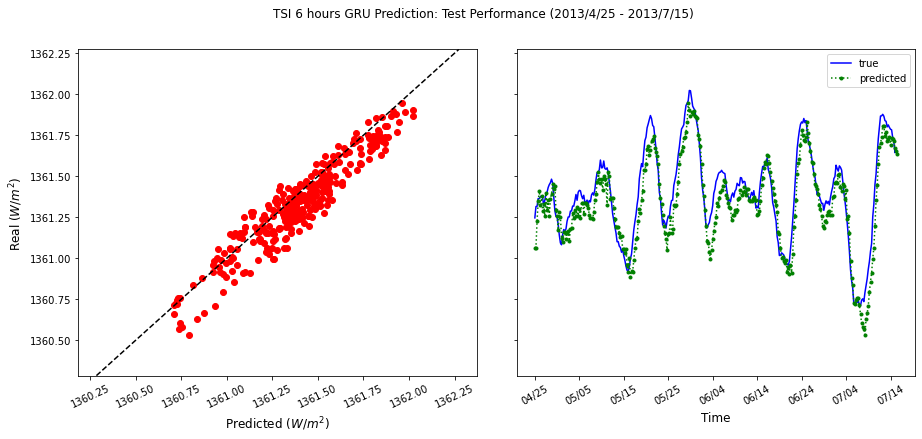

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt4)

plt.subplots_adjust(wspace=0.1)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])-0.25
ma = np.max([yTestP.max(),yTest.max()])+0.25

yAxis = [mi,ma]

plt.suptitle('TSI 6 hours GRU Prediction: Test Performance (2013/4/25 - 2013/7/15)')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2$)', labelpad=5, fontsize='large')
ax1.set_ylabel('Real ($W/m^2$)', labelpad=5, fontsize='large')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax1.tick_params(axis='x', rotation=25)

ax2.plot(datesT4,yTest,'b-',label='true')
ax2.plot(datesT4,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlabel('Time', labelpad=5, fontsize='large')
ax2.tick_params(axis='x', rotation=30)
# ax2.set_xticks(np.arange(datesT[0], datesT[-1], step=1))
# ax2.set_title('Test Performance')
ax2.legend()

fig.savefig('./Figures/GRU Test Set 4 - 6Hours.pdf', dpi=300, format='pdf', pad_inches=0.1)

### Predicting Test Set 5

In [97]:
from matplotlib import dates

dataT = []
hours = [0,0.25,0.5,0.75]
h = 0
datesT5 = np.zeros(Time5.shape[0])
for i in Time5:
    index = np.mod(h,4)
    dataT = str(date.fromordinal(int(i)))
    datesT5[h] = dates.date2num(dataT)+hours[index]
    h += 1
    
# datesT = dates.date2num(dataT)

hfmt5 = dates.DateFormatter('%m/%d')


ValueError: x and y must have same first dimension, but have shapes (115,) and (327, 1)

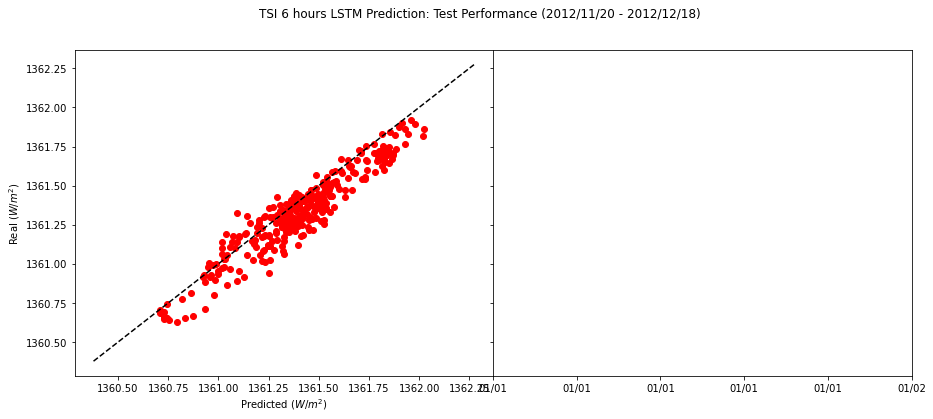

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt5)

plt.subplots_adjust(wspace=0.0)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])-0.25
ma = np.max([yTestP.max(),yTest.max()])+0.25

yAxis = [mi,ma]

plt.suptitle('TSI 6 hours LSTM Prediction: Test Performance (2012/11/20 - 2012/12/18)')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2$)')
ax1.set_ylabel('Real ($W/m^2$)')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')

ax2.plot(datesT5,yTest,'b-',label='true')
ax2.plot(datesT5,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlabel('Time')
# ax2.set_xticks(np.arange(datesT[0], datesT[-1], step=1))
# ax2.set_title('Test Performance')
ax2.legend()

#fig.savefig('./Figures/LSTM Test Set 5 - 6Hours.png', dpi=600, format='png')
fig.savefig('./Figures/LSTM Test Set5 - 6Hours.png', dpi=600, format='png')

In [10]:
S5 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_28dias.csv'))
E5 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_28dias.csv'))

S4 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_81dias.csv'))
E4 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_81dias.csv'))

(81,)
(81,)


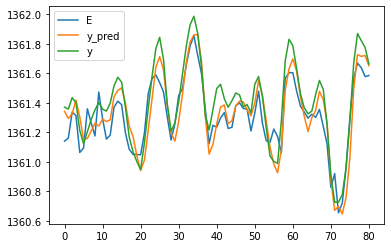

In [11]:
# print(len(np.arange(0,len(yTestP),4)))

#plt.plot(yTestP)
plt.plot(E4, label="E")

# yTestPNovo = yTestP[np.arange(3,len(yTestP),4)]

yTestPNovo = []
yTestPNovo.append(np.mean(yTestP[0:3]))
yTestNovo = []
yTestNovo.append(np.mean(yTest[0:3]))
for i in range(3,len(yTestP),4):
    yTestPNovo.append(np.mean(yTestP[i:i+4]))
    yTestNovo.append(np.mean(yTest[i:i+4]))

yTestNovo = np.asarray(yTestNovo)
yTestPNovo = np.asarray(yTestPNovo)

plt.plot(yTestPNovo[1:],label="y_pred")
plt.plot(yTestNovo[1:],label="y")

TimeNovo = Time4[np.arange(4,len(yTestP),4)]
# print(Time4)
print(TimeNovo.shape)

plt.legend()
print(E4.shape)
# print(S4.shape)
# print(yTestPNovo[1:].shape)

# print(yTestPNovo[:-1].shape)
# for i in Time4:
#     print(date.fromordinal(int(i)))

In [12]:
from matplotlib import dates

data4 = []

for i in TimeNovo:
    data4.append(str(date.fromordinal(int(i))))

dates4 = dates.date2num(data4)

# print(Time4)

hfmt = dates.DateFormatter('%m/%d')


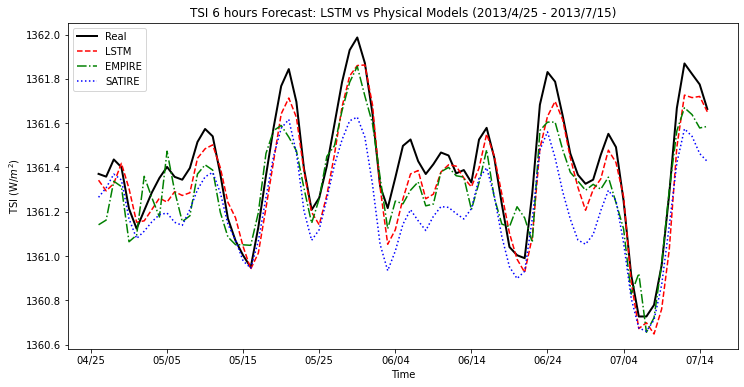

In [13]:
f = plt.figure(figsize=(12, 6))

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.title('TSI 6 hours Forecast: LSTM vs Physical Models (2013/4/25 - 2013/7/15)')
plt.plot(dates4,yTestNovo[1:], linewidth = 2, color='black', linestyle='-', label = 'Real')
plt.plot(dates4,yTestPNovo[1:], color='red', linestyle='--', label = 'LSTM')
plt.plot(dates4,E4, color='green', linestyle='-.', label = 'EMPIRE')
plt.plot(dates4,S4, color='blue', linestyle=':', label = 'SATIRE')
#plt.plot(dates3,lAModel[:,2])
plt.xlabel('Time')
plt.ylabel('TSI (W/$m^2$)')
plt.legend()

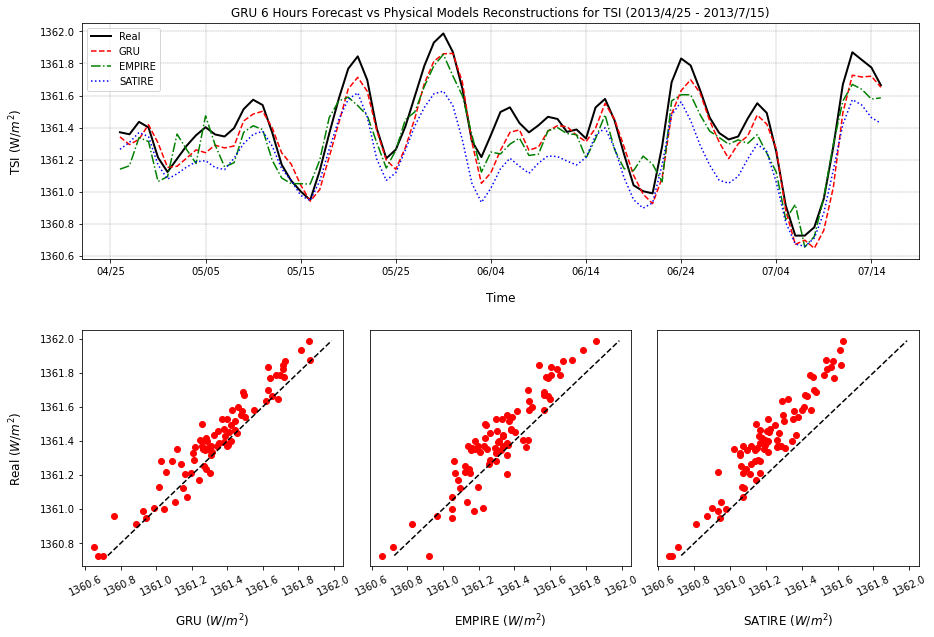

In [18]:
f = plt.figure(figsize=(15, 10))

minYAxis = np.min(yTestNovo[1:])
maxYAxis = np.max(yTestNovo[1:])

plt.subplots_adjust(wspace=0.1,hspace=0.3)

ax1 = plt.subplot(211)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)


ax1.set_title('GRU 6 Hours Forecast vs Physical Models Reconstructions for TSI (2013/4/25 - 2013/7/15)')
ax1.plot(dates4,yTestNovo[1:], linewidth = 2, color='black', linestyle='-', label = 'Real')
ax1.plot(dates4,yTestPNovo[1:], color='red', linestyle='--', label = 'GRU')
ax1.plot(dates4,E4, color='green', linestyle='-.', label = 'EMPIRE')
ax1.plot(dates4,S4, color='blue', linestyle=':', label = 'SATIRE')
#plt.plot(dates3,lAModel[:,2])
ax1.set_xlabel('Time', fontsize='large', labelpad=15) #, fontweight='bold')
ax1.set_ylabel('TSI (W/$m^2$)', fontsize='large', labelpad=15)
ax1.legend()
ax1.grid(color = '#888888', linestyle = '--', linewidth = 0.4)

ax2 = plt.subplot(234)
ax2.tick_params(axis='x', rotation=25)
ax2.scatter(yTestPNovo[1:],yTestNovo[1:], color='red')
ax2.set_xlabel('GRU ($W/m^2$)', labelpad=15, fontsize='large') #, fontweight='bold')
ax2.set_ylabel('Real ($W/m^2$)', labelpad=15, fontsize='large') #, fontsize='large', fontweight='bold')
# ax2.set_title('Training')
#plt.plot([-2,2],[-2,2])
ax2.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

ax3 = plt.subplot(235)
ax3.tick_params(axis='x', rotation=25)
ax3.scatter(E4,yTestNovo[1:], color='red')
ax3.set_xlabel('EMPIRE ($W/m^2$)', labelpad=15, fontsize='large') #, fontweight='bold'
ax3.set_yticks([])
# ax3.set_ylabel('Real ($W/m^2$)')
# ax3.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax3.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax3.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

ax4 = plt.subplot(236)
ax4.tick_params(axis='x', rotation=25)
ax4.scatter(S4,yTestNovo[1:], color='red')
ax4.set_xlabel('SATIRE ($W/m^2$)', labelpad=15, fontsize='large') #, fontweight='bold')
ax4.set_yticks([])
# ax4.set_ylabel('Real ($W/m^2$)')
# ax4.set_title('Validation')
#plt.plot([-2,2],[-2,2])
ax4.plot([minYAxis, maxYAxis], [minYAxis, maxYAxis], color='black', 
         linestyle='--', label='optimal')
# ax4.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

In [17]:
from matplotlib import dates

data5 = []

for i in Time5:
    data5.append(str(date.fromordinal(int(i))))

dates5 = dates.date2num(data5)

# print(Time4)

hfmt = dates.DateFormatter('%m/%d')


ValueError: x and y must have same first dimension, but have shapes (114,) and (28,)

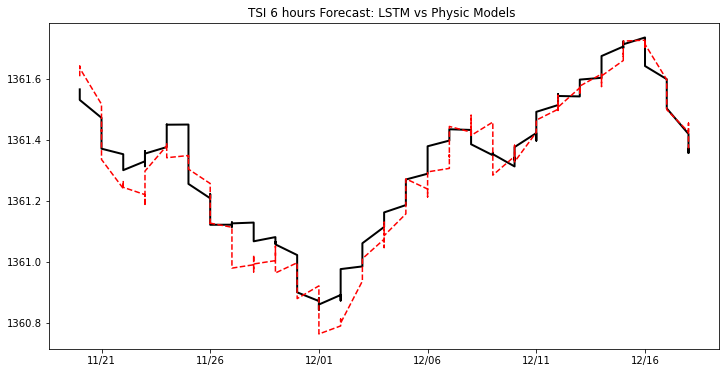

In [19]:
f = plt.figure(figsize=(12, 6))

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.title('TSI 6 hours Forecast: LSTM vs Physic Models ')
plt.plot(dates5,yTest, linewidth = 2, color='black', linestyle='-', label = 'Real')
plt.plot(dates5,yTestP, color='red', linestyle='--', label = 'LSTM')
plt.plot(dates5[1:],E, color='green', linestyle='-.', label = 'EMPIRE')
plt.plot(dates5[1:],S, color='blue', linestyle=':', label = 'SATIRE')
#plt.plot(dates3,lAModel[:,2])
plt.xlabel('Time')
plt.ylabel('TSI (W/$m^2$)')
plt.legend()

1
range(35, 36)


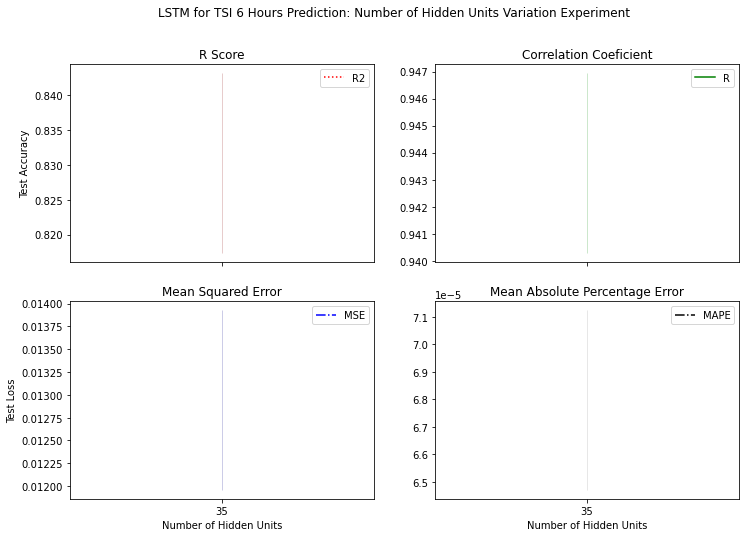

In [36]:
df1 = np.asarray(lstm)
error = np.asarray(error)

n_tests = testsqtd #number of tests for each setting
n_groups = int(df1.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
#groups = np.unique(df1[:, 0]).astype(np.int32) # Each group label
groups = unitsNumbers
colors = ['red', 'green', 'blue', 'black'] # boxplot's colors by type RNN
print(n_groups)
print(groups)

R2MeansStds = [] # R2
RMeansStds = [] # R
MSEMeansStds = [] # MSE
MAPEMeansStds = [] # MAPE

# ValLossMeansStds = [] # Validation Loss

for i in range(n_groups):
    R2MeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 1]), np.std(df1[intervals[i]:intervals[i]+n_tests, 1])])
    RMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 2]), np.std(df1[intervals[i]:intervals[i]+n_tests, 2])])
    MSEMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 3]), np.std(df1[intervals[i]:intervals[i]+n_tests, 3])])
    MAPEMeansStds.append([np.mean(df1[intervals[i]:intervals[i]+n_tests, 4]), np.std(df1[intervals[i]:intervals[i]+n_tests, 4])])
#     ValLossMeansStds.append([np.mean(error[intervals[i]:intervals[i]+n_tests, 1]), np.std(error[intervals[i]:intervals[i]+n_tests, 1])])

R2MeansStds = np.asarray(R2MeansStds)
RMeansStds = np.asarray(RMeansStds)
MSEMeansStds = np.asarray(MSEMeansStds)
MAPEMeansStds = np.asarray(MAPEMeansStds)
# ValLossMeansStds = np.asarray(ValLossMeansStds)

fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,8))

plt.suptitle('LSTM for TSI 6 Hours Prediction: Number of Hidden Units Variation Experiment')

ax1.plot(groups, R2MeansStds[:,0], c=colors[0], label='R2', linestyle=':')
ax1.fill_between(groups, R2MeansStds[:,0] - R2MeansStds[:,1], R2MeansStds[:,0] + R2MeansStds[:,1], color='#880000', alpha=0.2)

ax2.plot(groups, RMeansStds[:,0], c=colors[1], label='R', linestyle='-')
ax2.fill_between(groups, RMeansStds[:,0] - RMeansStds[:,1], RMeansStds[:,0] + RMeansStds[:,1], color='#008800', alpha=0.2)

ax3.plot(groups, MSEMeansStds[:,0], c=colors[2], label='MSE', linestyle='-.')
ax3.fill_between(groups, MSEMeansStds[:,0] - MSEMeansStds[:,1], MSEMeansStds[:,0] + MSEMeansStds[:,1], color='#000088', alpha=0.2)

ax4.plot(groups, MAPEMeansStds[:,0], c=colors[3], label='MAPE', linestyle='-.')
ax4.fill_between(groups, MAPEMeansStds[:,0] - MAPEMeansStds[:,1], MAPEMeansStds[:,0] + MAPEMeansStds[:,1], color='#888888', alpha=0.2)

# ax2.plot(groups, ValLossMeansStds[:,0], c=colors[3], label='Val Loss', linestyle='-.')
# ax2.fill_between(groups, ValLossMeansStds[:,0] - ValLossMeansStds[:,1], ValLossMeansStds[:,0] + ValLossMeansStds[:,1], color='#888888', alpha=0.2)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax3.set_xlabel('Number of Hidden Units')
ax4.set_xlabel('Number of Hidden Units')

ax1.set_ylabel('Test Accuracy')
ax3.set_ylabel('Test Loss')

ax1.set_xticks(groups) # repositioning labels batchsize
ax2.set_xticks(groups)
ax3.set_xticks(groups)
ax4.set_xticks(groups)
ax1.set_title('R Score')
ax2.set_title('Correlation Coeficient')
ax3.set_title('Mean Squared Error')
ax4.set_title('Mean Absolute Percentage Error')

plt.show()